https://www.kaggle.com/datasets/guslovesmath/shakespeare-plays-dataset
https://www.gutenberg.org/


In [9]:
# Feel free to add dependencies, but make sure that they are included in environment.yml

#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import altair as alt
from altair import datum
alt.data_transformers.disable_max_rows()

from sklearn import manifold
from openTSNE import TSNE
from umap import UMAP
from transformers import AutoTokenizer, AutoModel
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE, MDS
import umap

In [10]:
df = pd.read_csv("shakespeare_plays.csv")
df.head()


Unnamed: 0                  play_name   genre character  act  scene  \
0           0  All's Well That Ends Well  Comedy  Countess    1      1   
1           1  All's Well That Ends Well  Comedy   Bertram    1      1   
2           2  All's Well That Ends Well  Comedy   Bertram    1      1   
3           3  All's Well That Ends Well  Comedy   Bertram    1      1   
4           4  All's Well That Ends Well  Comedy     Lafeu    1      1   

   sentence                                               text     sex  
0         1  In delivering my son from me, I bury a second ...  female  
1         2  And I in going, madam, weep o'er my father's d...    male  
2         3  anew: but I must attend his majesty's command, to    male  
3         4     whom I am now in ward, evermore in subjection.    male  
4         5  You shall find of the king a husband, madam; you,    male

In [11]:
# Filter for Macbeth
macbeth_lines = df[df['play_name'] == 'Macbeth']

In [12]:
print(macbeth_lines)

       Unnamed: 0 play_name    genre     character  act  scene  sentence  \
94067       94067   Macbeth  Tragedy   First Witch    1      1         1   
94068       94068   Macbeth  Tragedy   First Witch    1      1         2   
94069       94069   Macbeth  Tragedy  Second Witch    1      1         3   
94070       94070   Macbeth  Tragedy  Second Witch    1      1         4   
94071       94071   Macbeth  Tragedy   Third Witch    1      1         5   
...           ...       ...      ...           ...  ...    ...       ...   
96447       96447   Macbeth  Tragedy       Malcolm    5      8        82   
96448       96448   Macbeth  Tragedy       Malcolm    5      8        83   
96449       96449   Macbeth  Tragedy       Malcolm    5      8        84   
96450       96450   Macbeth  Tragedy       Malcolm    5      8        85   
96451       96451   Macbeth  Tragedy       Malcolm    5      8        86   

                                                 text     sex  
94067                  

In [13]:
macbeth_lines.set_index("sentence", inplace=True)


In [14]:
macbeth_lines.head(30)

Unnamed: 0 play_name    genre     character  act  scene  \
sentence                                                            
1              94067   Macbeth  Tragedy   First Witch    1      1   
2              94068   Macbeth  Tragedy   First Witch    1      1   
3              94069   Macbeth  Tragedy  Second Witch    1      1   
4              94070   Macbeth  Tragedy  Second Witch    1      1   
5              94071   Macbeth  Tragedy   Third Witch    1      1   
6              94072   Macbeth  Tragedy   First Witch    1      1   
7              94073   Macbeth  Tragedy  Second Witch    1      1   
8              94074   Macbeth  Tragedy   Third Witch    1      1   
9              94075   Macbeth  Tragedy   First Witch    1      1   
10             94076   Macbeth  Tragedy  Second Witch    1      1   
11             94077   Macbeth  Tragedy   Third Witch    1      1   
12             94078   Macbeth  Tragedy           All    1      1   
13             94079   Macbeth  Tragedy           All    1      1   
1              94080   Macbeth  Tragedy        Duncan    1      2   
2              94081   Macbeth  Tragedy        Duncan    1      2   
3              94082   Macbeth  Tragedy        Duncan    1      2   
4              94083   Macbeth  Tragedy       Malcolm    1      2   
5              94084   Macbeth  Tragedy       Malcolm    1      2   
6              94085   Macbeth  Tragedy       Malcolm    1      2   
7              94086   Macbeth  Tragedy       Malcolm    1      2   
8              94087   Macbeth  Tragedy       Malcolm    1      2   
9              94088   Macbeth  Tragedy      Sergeant    1      2   
10             94089   Macbeth  Tragedy      Sergeant    1      2   
11             94090   Macbeth  Tragedy      Sergeant    1      2   
12             94091   Macbeth  Tragedy      Sergeant    1      2   
13             94092   Macbeth  Tragedy      Sergeant    1      2   
14             94093   Macbeth  Tragedy      Sergeant    1      2   
15             94094   Macbeth  Tragedy      Sergeant    1      2   
16             94095   Macbeth  Tragedy      Sergeant    1      2   
17             94096   Macbeth  Tragedy      Sergeant    1      2   

                                                      text     sex  
sentence                                                            
1                           When shall we three meet again  female  
2                       In thunder, lightning, or in rain?  female  
3                              When the hurlyburly's done,  female  
4                          When the battle's lost and won.  female  
5                         That will be ere the set of sun.  female  
6                                         Where the place?  female  
7                                          Upon the heath.  female  
8                              There to meet with Macbeth.  female  
9                                      I come, Graymalkin!  female  
10                                          Paddock calls.  female  
11                                                   Anon.  female  
12                         Fair is foul, and foul is fair:    male  
13                   Hover through the fog and filthy air.    male  
1                  What bloody man is that? He can report,    male  
2                  As seemeth by his plight, of the revolt    male  
3                                        The newest state.    male  
4                                     This is the sergeant    male  
5                 Who like a good and hardy soldier fought    male  
6                'Gainst my captivity. Hail, brave friend!    male  
7               Say to the king the knowledge of the broil    male  
8                                  As thou didst leave it.    male  
9                                       Doubtful it stood;    male  
10           As two spent swimmers, that do cling together    male  
11         And choke their art. The merciless Macdonwald--    male  
12     

In [15]:
# the play represnts : 2385 rows x 9 columns

Using Bert for the embedings of Macbeth play Lines, which originally are 2385 Line, each with 9 cols;

represent:

play_name: The name of the play.
genre: The genre of the play (Comedy, History, Tragedy).
character: The character who delivers the line.
act: Act number in the play.
scene: Scene number in the act.
sentence: Line number in the scene.
text: The text of the dialogue.
sex: The gender of the character, reflecting Shakespeare's diverse cast.

In [16]:
# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"  
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Generate embeddings for each line
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    # Take the mean of the last hidden state to get a single embedding vector
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return embedding

c:\Users\engah\anaconda3\envs\xai_proj_space\lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
c:\Users\engah\anaconda3\envs\xai_proj_space\lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit an

In [17]:

macbeth_lines['embedding'] = macbeth_lines['text'].apply(get_embedding)

# Stack embeddings for dimensionality reduction
embeddings = np.vstack(macbeth_lines['embedding'].values)


C:\Users\engah\AppData\Local\Temp\ipykernel_34680\3768673618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macbeth_lines['embedding'] = macbeth_lines['text'].apply(get_embedding)


In [19]:
print(embeddings.shape[1])

768


In [20]:
# Apply PCA for 2D projection
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)


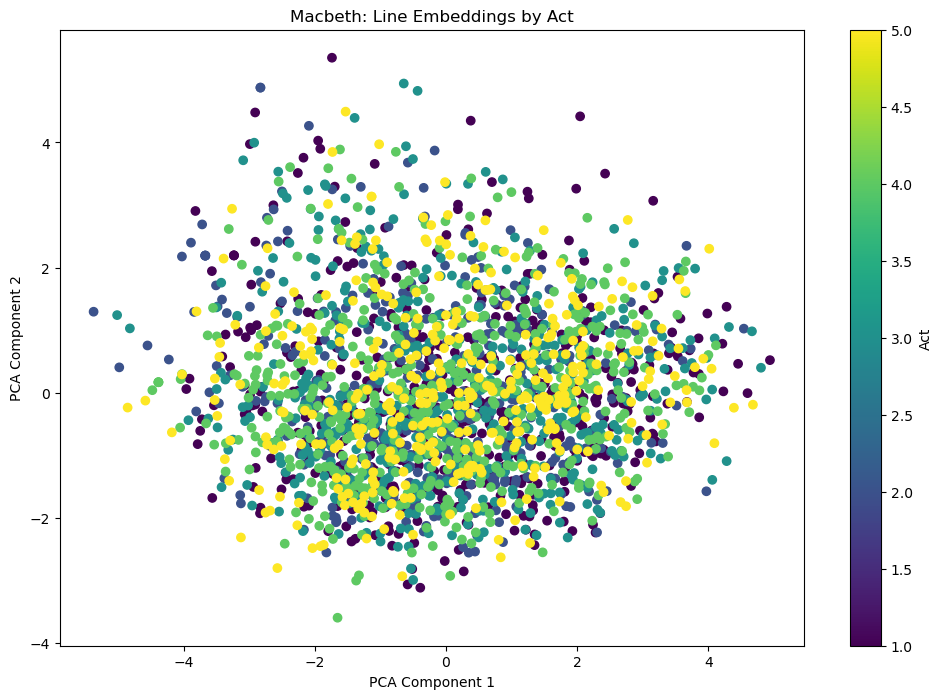

In [21]:
# Plot the reduced embeddings
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=macbeth_lines['act'], cmap='viridis', marker='o')
plt.colorbar(label='Act')
plt.title("Macbeth: Line Embeddings by Act")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

Here we can see that Bert have broadcasted the dims to 768, thus this is our cleaned dataset, we are going next to get more visualizarions , also how each character plays a role and intrpet states of the intersting story .

In [25]:
# Define projection methods
projections = {
    "PCA": PCA(n_components=2),
    "t-SNE": TSNE(n_components=2, perplexity=38, random_state=42),
    "UMAP": umap.UMAP(n_components=2, random_state=42),
}

c:\Users\engah\anaconda3\envs\xai_proj_space\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


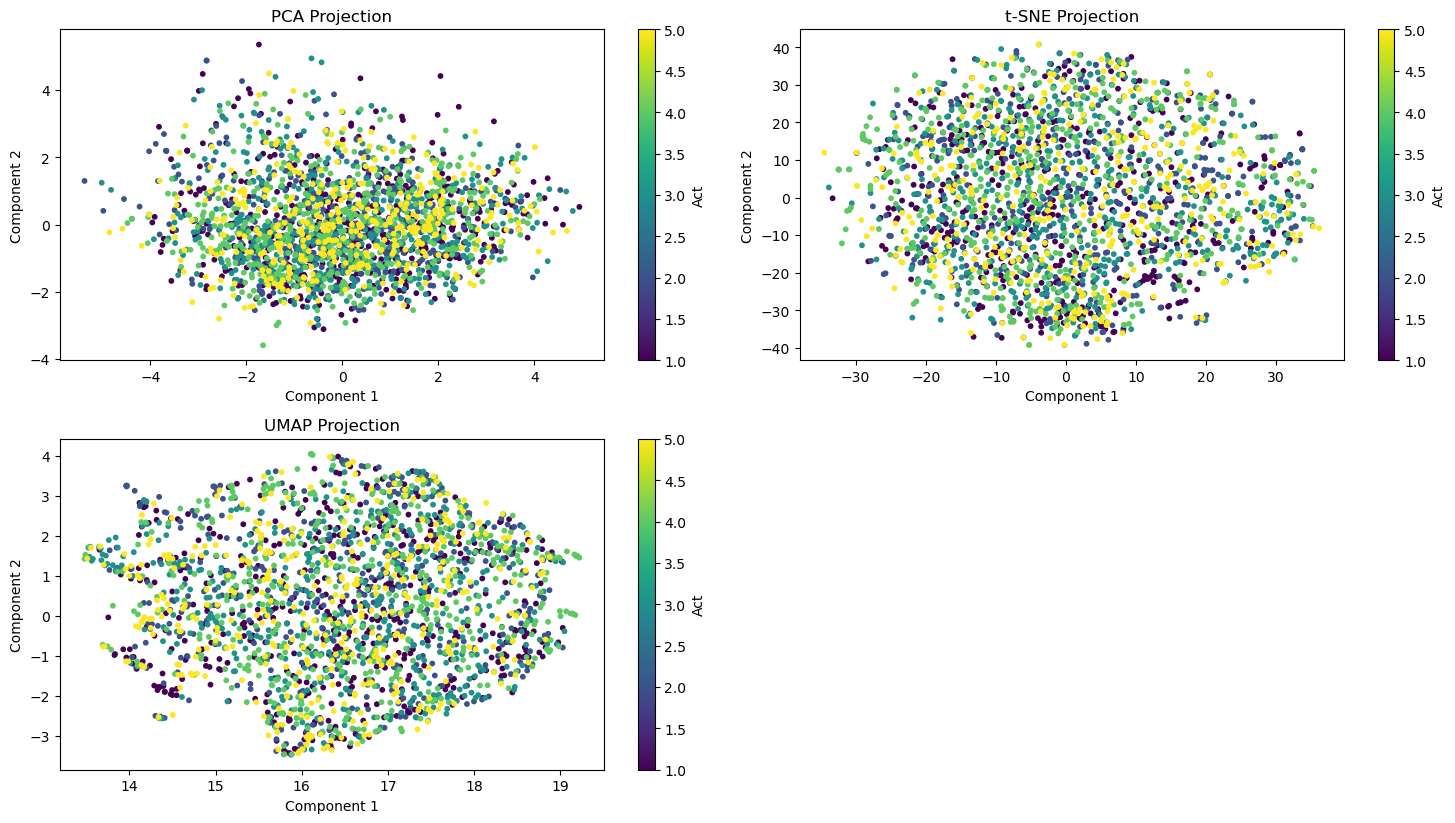

In [26]:
# Apply each projection and plot results
plt.figure(figsize=(15, 12))
for i, (name, method) in enumerate(projections.items(), 1):
    if name in ["t-SNE"]:
        reduced = method.fit_transform(embeddings)
    else:
        reduced = method.fit_transform(embeddings)

    # Plot each projection
    plt.subplot(3, 2, i)
    plt.scatter(reduced[:, 0], reduced[:, 1], c=macbeth_lines['act'], cmap='viridis', s=10)
    plt.colorbar(label='Act')
    plt.title(f"{name} Projection")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")

plt.tight_layout()
plt.show()

In [27]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Define projection methods
projections = {
    "PCA": PCA(n_components=2),
    "t-SNE": TSNE(n_components=2, perplexity=30, random_state=42),
    "UMAP": umap.UMAP(n_components=2, random_state=42),
}

# Create a dictionary to store reduced embeddings for each method
reduced_embeddings = {}

for name, method in projections.items():
    reduced = method.fit_transform(embeddings)
    reduced_embeddings[name] = reduced

# Add reduced embeddings to the DataFrame for each method
for name, reduced in reduced_embeddings.items():
    macbeth_lines[f'{name}_x'] = reduced[:, 0]
    macbeth_lines[f'{name}_y'] = reduced[:, 1]


c:\Users\engah\anaconda3\envs\xai_proj_space\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\engah\AppData\Local\Temp\ipykernel_34680\167506806.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macbeth_lines[f'{name}_x'] = reduced[:, 0]
C:\Users\engah\AppData\Local\Temp\ipykernel_34680\167506806.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [28]:
import plotly.express as px

# Function to create interactive Plotly scatter plot
def plot_projection(df, method_name):
    fig = px.scatter(
        df,
        x=f"{method_name}_x",
        y=f"{method_name}_y",
        color="act",
        hover_data={
            "text": True,      # Original line text
            "character": True, # Character speaking the line
            "scene": True,     # Scene number
            "act": True,       # Act number
            f"{method_name}_x": False,
            f"{method_name}_y": False
        },
        title=f"{method_name} Projection of Macbeth Embeddings",
        labels={"act": "Act"}
    )
    fig.update_layout(
        xaxis_title=f"{method_name} Component 1",
        yaxis_title=f"{method_name} Component 2"
    )
    fig.show()

# Plot each projection method
for method in projections.keys():
    plot_projection(macbeth_lines, method)


We will Focus here onTsne to gert better results

In [29]:
from sklearn.manifold import TSNE
import plotly.express as px

# Set up t-SNE with a higher number of iterations
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)  # n_iter set to 1000 for more steps

# Apply t-SNE to the embeddings
tsne_embeddings = tsne.fit_transform(embeddings)

# Add t-SNE embeddings to the DataFrame
macbeth_lines['t-SNE_x'] = tsne_embeddings[:, 0]
macbeth_lines['t-SNE_y'] = tsne_embeddings[:, 1]

# Function to create interactive Plotly scatter plot for t-SNE
def plot_tsne(df):
    fig = px.scatter(
        df,
        x="t-SNE_x",
        y="t-SNE_y",
        color="act",
        hover_data={
            "text": True,      # Original line text
            "character": True, # Character speaking the line
            "scene": True,     # Scene number
            "act": True,       # Act number
            "t-SNE_x": False,
            "t-SNE_y": False
        },
        title="t-SNE Projection of Macbeth Embeddings",
        labels={"act": "Act"}
    )
    fig.update_layout(
        xaxis_title="t-SNE Component 1",
        yaxis_title="t-SNE Component 2"
    )
    fig.show()

# Plot the t-SNE projection
plot_tsne(macbeth_lines)


C:\Users\engah\AppData\Local\Temp\ipykernel_34680\1400902038.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\engah\AppData\Local\Temp\ipykernel_34680\1400902038.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
import plotly.express as px

# Set up t-SNE with a higher number of iterations
tsne = TSNE(n_components=2, perplexity=300, n_iter=1000, random_state=42)  # n_iter set to 1000 for more steps

# Apply t-SNE to the embeddings
tsne_embeddings = tsne.fit_transform(embeddings)

# Add t-SNE embeddings to the DataFrame
macbeth_lines['t-SNE_x'] = tsne_embeddings[:, 0]
macbeth_lines['t-SNE_y'] = tsne_embeddings[:, 1]

# Function to create interactive Plotly scatter plot for t-SNE
def plot_tsne(df):
    fig = px.scatter(
        df,
        x="t-SNE_x",
        y="t-SNE_y",
        color="act",
        hover_data={
            "text": True,      # Original line text
            "character": True, # Character speaking the line
            "scene": True,     # Scene number
            "act": True,       # Act number
            "t-SNE_x": False,
            "t-SNE_y": False
        },
        title="t-SNE Projection of Macbeth Embeddings",
        labels={"act": "Act"}
    )
    fig.update_layout(
        xaxis_title="t-SNE Component 1",
        yaxis_title="t-SNE Component 2"
    )
    fig.show()

# Plot the t-SNE projection
plot_tsne(macbeth_lines)

C:\Users\engah\AppData\Local\Temp\ipykernel_34680\3382441897.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\engah\AppData\Local\Temp\ipykernel_34680\3382441897.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Character Interaction Network

In [33]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Filter for Macbeth and group by scene to get character interactions
data = df.copy()
macbeth_lines = data[data['play_name'] == 'Macbeth']

# Group by scene and aggregate characters in each scene
scene_groups = macbeth_lines.groupby(['act', 'scene'])['character'].apply(list)

# Create an empty graph
G = nx.Graph()

# Count the number of lines spoken by each character for node size
line_counts = macbeth_lines['character'].value_counts()

# Add nodes with size based on line count
for character, count in line_counts.items():
    G.add_node(character, size=count)

# Add edges based on shared scenes
from collections import Counter
edge_weights = Counter()

for characters in scene_groups:
    # Create pairs of characters who share the scene
    for i, character1 in enumerate(characters):
        for character2 in characters[i + 1:]:
            if character1 != character2:
                # Update edge weight based on co-occurrence in scenes
                edge_weights[(character1, character2)] += 1

# Add edges to the graph with weights
for (character1, character2), weight in edge_weights.items():
    G.add_edge(character1, character2, weight=weight)

# Setting node size and edge thickness
node_sizes = [G.nodes[character]['size'] * 5 for character in G.nodes]  # Scale up for visibility
edge_widths = [G.edges[edge]['weight'] for edge in G.edges]

# Define character groups (e.g., Macbeth, Lady Macbeth, Witches)
character_groups = {
    'Macbeth': 'Macbeth', 'Lady Macbeth': 'Macbeth',
    'First Witch': 'Witches', 'Second Witch': 'Witches', 'Third Witch': 'Witches',
    'Banquo': 'Other', 'Duncan': 'Other', 'Malcolm': 'Other'
}
colors = {'Macbeth': 'red', 'Witches': 'purple', 'Other': 'gray'}
node_colors = [colors.get(character_groups.get(character, 'Other'), 'gray') for character in G.nodes]


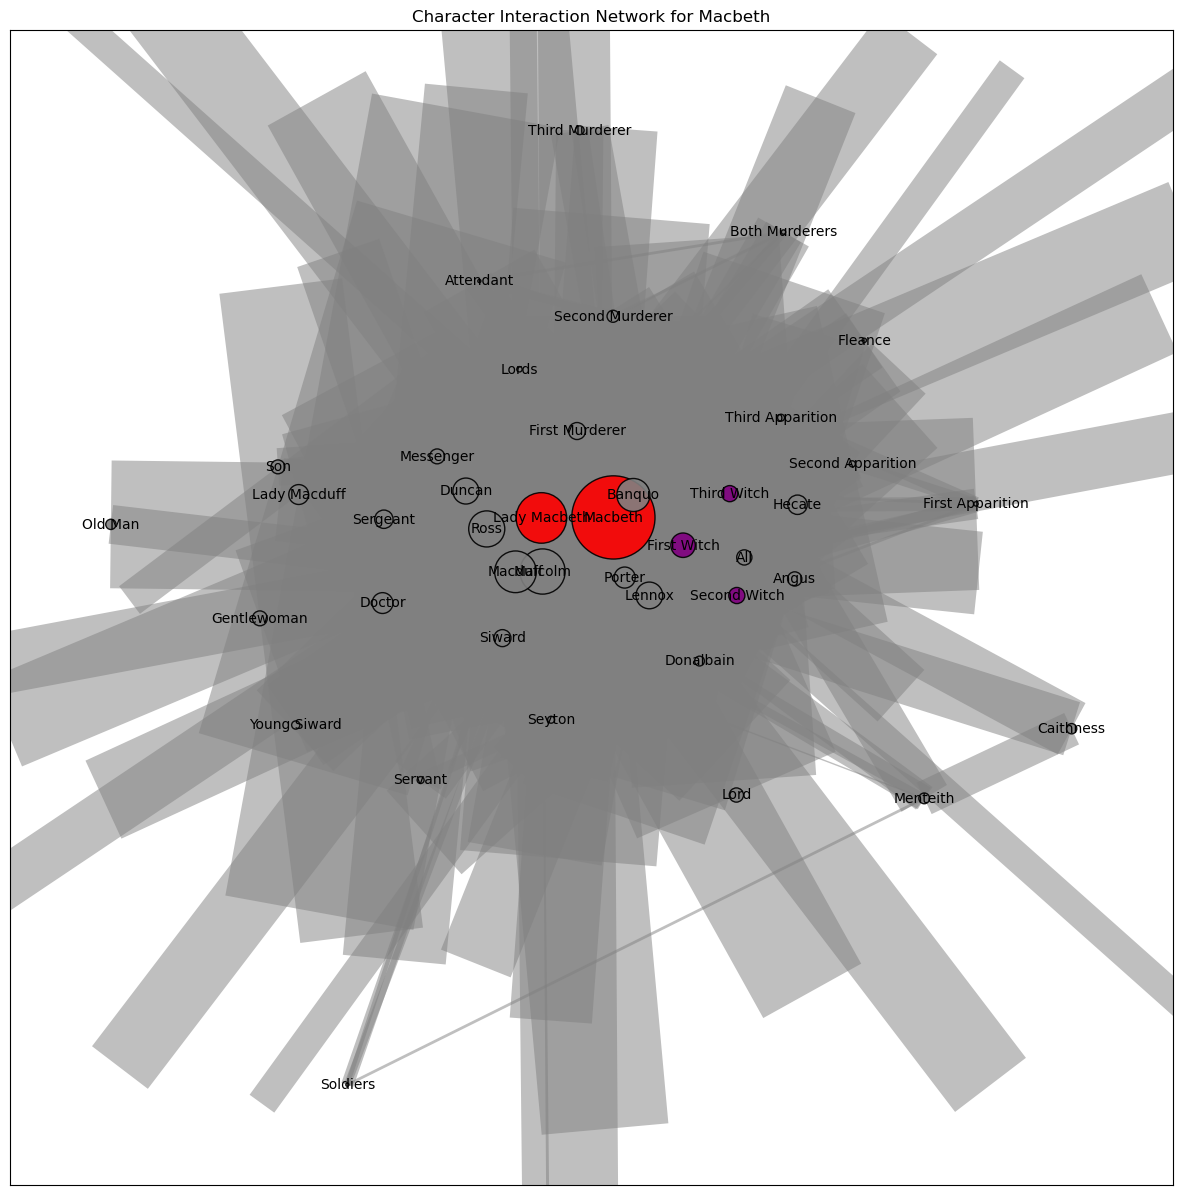

In [34]:
# Set up plot
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, seed=42)  # Layout for visualization

# Draw nodes with sizes based on line count
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9, edgecolors='k')

# Draw edges with thickness based on interaction frequency
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='gray', alpha=0.5)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

# Show plot
plt.title("Character Interaction Network for Macbeth")
plt.show()


we will improve the visualizartions

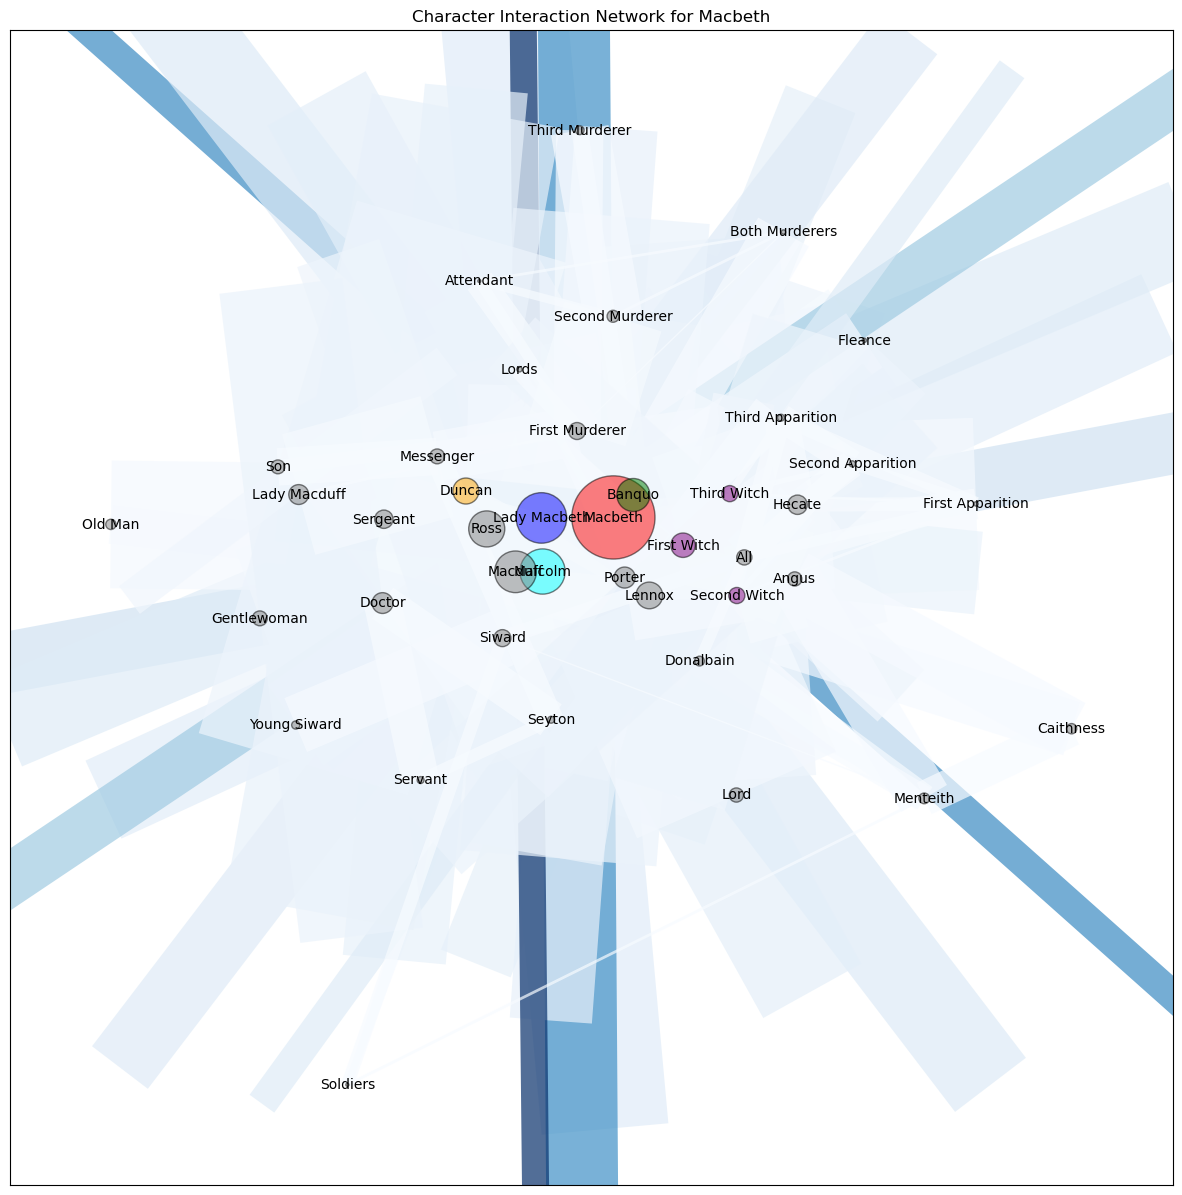

In [41]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.cm as cm


# Filter for Macbeth and group by scene to get character interactions
data = df.copy()
macbeth_lines = data[data['play_name'] == 'Macbeth']

# Group by scene and aggregate characters in each scene
scene_groups = macbeth_lines.groupby(['act', 'scene'])['character'].apply(list)

# Create an empty graph
G = nx.Graph()

# Count the number of lines spoken by each character for node size
line_counts = macbeth_lines['character'].value_counts()

# Add nodes with size based on line count
for character, count in line_counts.items():
    G.add_node(character, size=count)

# Add edges based on shared scenes
edge_weights = Counter()
for characters in scene_groups:
    for i, character1 in enumerate(characters):
        for character2 in characters[i + 1:]:
            if character1 != character2:
                edge_weights[(character1, character2)] += 1

# Add edges to the graph with weights
for (character1, character2), weight in edge_weights.items():
    G.add_edge(character1, character2, weight=weight)

# Setting node size and edge thickness
node_sizes = [G.nodes[character]['size'] * 5 for character in G.nodes]  # Scale up for visibility
edge_widths = [G.edges[edge]['weight'] for edge in G.edges]

# Define unique colors for each main character and default colors for others
character_colors = {
    'Macbeth': 'red', 
    'Lady Macbeth': 'blue',
    'First Witch': 'purple', 
    'Second Witch': 'purple', 
    'Third Witch': 'purple',
    'Banquo': 'green', 
    'Duncan': 'orange', 
    'Malcolm': 'cyan'
}
node_colors = [character_colors.get(character, 'gray') for character in G.nodes]

# Set up plot
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, seed=42)  # Layout for visualization

# Draw nodes with sizes based on line count and unique colors
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.5, edgecolors='k')

# Draw edges with thickness based on interaction frequency
# Normalize edge weights for color mapping
max_weight = max(edge_widths)
edge_colors = [cm.Blues(weight / max_weight) for weight in edge_widths]  # Using a blue color map

# Draw edges with color based on weight
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors, alpha=0.7)

#nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='gray', alpha=0.5)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

# Show plot
plt.title("Character Interaction Network for Macbeth")
plt.show()


Explanation of the Visualization
Node Size by Line Count: Characters who speak more lines appear as larger nodes, highlighting main characters.
Edge Thickness by Interaction Frequency: Thicker edges represent more frequent interactions between characters, showing strong relationships or alliances.
Character Groups by Color: Using colors to represent different character groups helps distinguish alliances or thematic roles (e.g., red for Macbeth, purple for witches, gray for others).

In [42]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment intensity for each line in Macbeth
macbeth_lines = data[data['play_name'] == 'Macbeth'].copy()  # Filter for Macbeth

def calculate_intensity(text):
    sentiment = sid.polarity_scores(text)
    return abs(sentiment['compound'])  # Use absolute compound score as intensity

# Apply the sentiment intensity function
macbeth_lines['intensity'] = macbeth_lines['text'].apply(calculate_intensity)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\engah\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [43]:
# Group by act and scene, then calculate the average intensity per scene
scene_tension = macbeth_lines.groupby(['act', 'scene'])['intensity'].mean().reset_index()
scene_tension['scene_id'] = scene_tension['act'].astype(str) + '.' + scene_tension['scene'].astype(str)


In [45]:
import plotly.graph_objects as go

# Create a line plot of tension over scenes with Plotly
fig = go.Figure()

# Add tension line
fig.add_trace(go.Scatter(
    x=scene_tension['scene_id'],
    y=scene_tension['intensity'],
    mode='lines+markers',
    name='Tension Intensity',
    line=dict(color='firebrick', width=2),
    marker=dict(size=6)
))

# Highlight transitions between acts
for act in scene_tension['act'].unique():
    act_scenes = scene_tension[scene_tension['act'] == act]
    first_scene = act_scenes.index[0]  # Use the index instead of scene_id directly
    fig.add_vline(
        x=first_scene,
        line=dict(color="grey", dash="dash"),
        annotation_text=f"Act {act} Start",
        annotation_position="top left"
    )

# Customize layout
fig.update_layout(
    title="Scene-to-Scene Tension Transitions in Macbeth",
    xaxis_title="Scene (Act.Scene)",
    yaxis_title="Tension Intensity",
    xaxis=dict(type='category', tickangle=45),  # Use categorical x-axis
    yaxis=dict(range=[0, max(scene_tension['intensity']) + 0.1]),
    showlegend=False
)

# Show the plot
fig.show()

Character Sentiment Heatmap

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment score for each line in Macbeth
macbeth_lines = data[data['play_name'] == 'Macbeth'].copy()  # Filter for Macbeth

# Calculate compound sentiment score for each line
macbeth_lines['sentiment'] = macbeth_lines['text'].apply(lambda text: sid.polarity_scores(text)['compound'])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\engah\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [47]:
# Group by character, act, and scene, and calculate the average sentiment score
character_sentiment = macbeth_lines.groupby(['character', 'act', 'scene'])['sentiment'].mean().reset_index()

# Create a new column for a combined "Act.Scene" identifier
character_sentiment['scene_id'] = character_sentiment['act'].astype(str) + '.' + character_sentiment['scene'].astype(str)

# Pivot the data to create a matrix with characters as rows and scenes as columns
sentiment_matrix = character_sentiment.pivot(index='character', columns='scene_id', values='sentiment')
sentiment_matrix = sentiment_matrix.fillna(0)  # Fill NaNs with 0 (neutral sentiment)


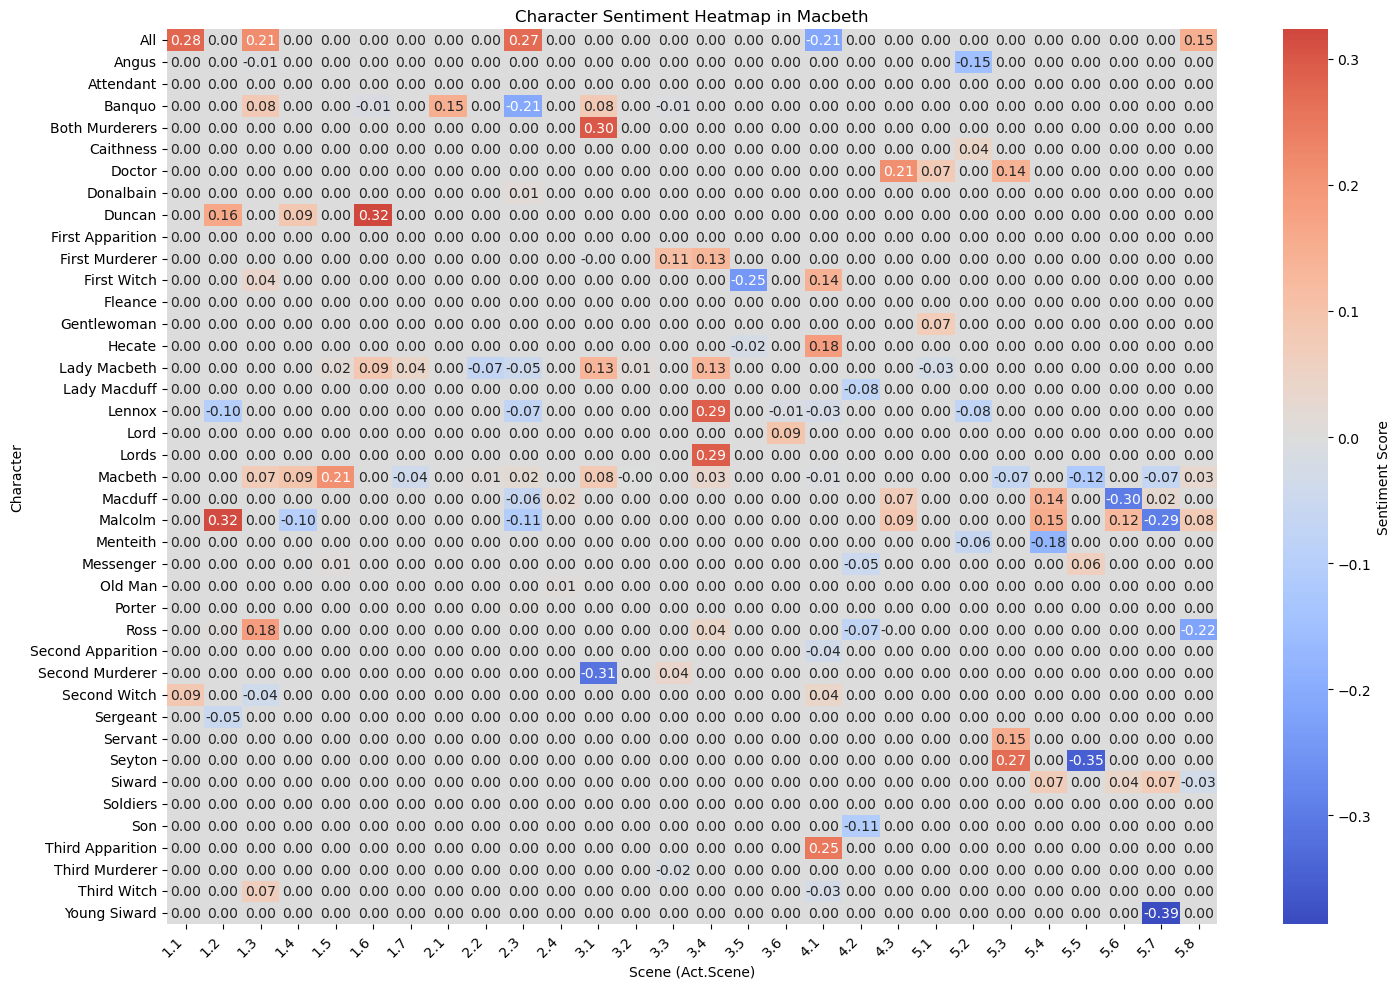

In [48]:
# Set up the plot size
plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(
    sentiment_matrix,
    cmap="coolwarm",  # Red for negative, blue for positive sentiment
    center=0,  # Center on neutral sentiment
    annot=True,  # Annotate with sentiment values
    fmt=".2f",  # Format annotations to 2 decimal places
    cbar_kws={'label': 'Sentiment Score'}
)

# Customize plot
plt.title("Character Sentiment Heatmap in Macbeth")
plt.xlabel("Scene (Act.Scene)")
plt.ylabel("Character")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


we will focus on main characters

# Define main characters to focus on
main_characters = ["Macbeth", "Lady Macbeth", "First Witch", "Second Witch", "Third Witch"]

# Filter the DataFrame for only these main characters
main_character_lines = macbeth_lines[macbeth_lines['character'].isin(main_characters)]


In [49]:
# Define main characters to focus on
main_characters = ["Macbeth", "Lady Macbeth", "First Witch", "Second Witch", "Third Witch"]

# Filter the DataFrame for only these main characters
main_character_lines = macbeth_lines[macbeth_lines['character'].isin(main_characters)]


In [50]:
# Group by character, act, and scene, then calculate the average sentiment score
main_character_sentiment = main_character_lines.groupby(['character', 'act', 'scene'])['sentiment'].mean().reset_index()

# Create a new column for a combined "Act.Scene" identifier
main_character_sentiment['scene_id'] = main_character_sentiment['act'].astype(str) + '.' + main_character_sentiment['scene'].astype(str)

# Pivot the data to create a matrix with characters as rows and scenes as columns
main_sentiment_matrix = main_character_sentiment.pivot(index='character', columns='scene_id', values='sentiment')
main_sentiment_matrix = main_sentiment_matrix.fillna(0)  # Fill NaNs with 0 for neutral sentiment


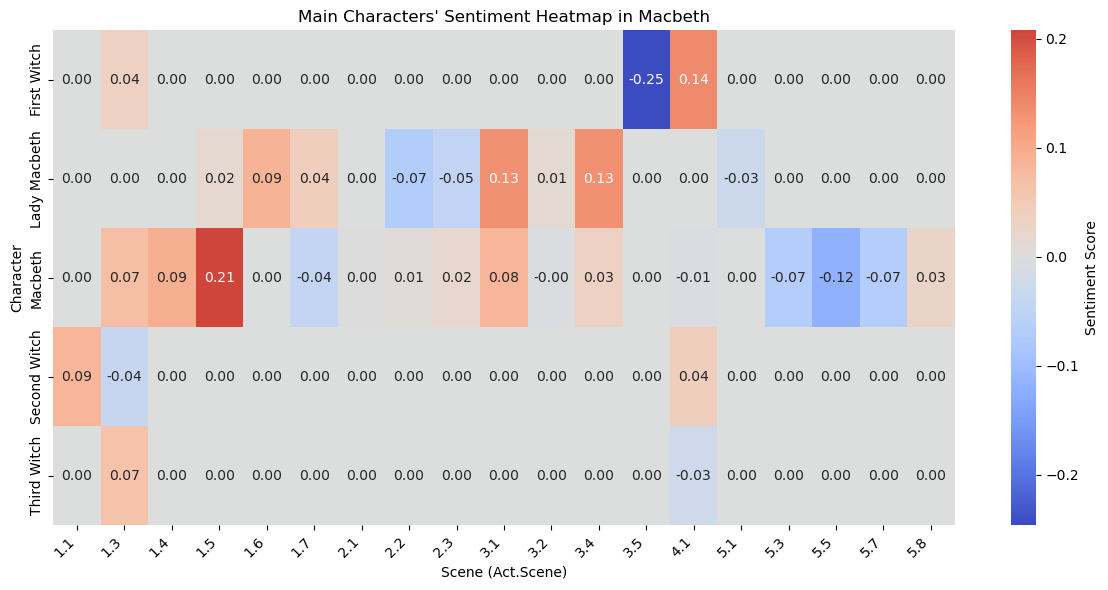

In [51]:
# Set up the plot size
plt.figure(figsize=(12, 6))

# Create the heatmap
sns.heatmap(
    main_sentiment_matrix,
    cmap="coolwarm",  # Red for negative, blue for positive sentiment
    center=0,  # Center on neutral sentiment
    annot=True,  # Annotate with sentiment values
    fmt=".2f",  # Format annotations to 2 decimal places
    cbar_kws={'label': 'Sentiment Score'}
)

# Customize plot
plt.title("Main Characters' Sentiment Heatmap in Macbeth")
plt.xlabel("Scene (Act.Scene)")
plt.ylabel("Character")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


WE will DIscuss Dialouge Dynamics

In [52]:
import pandas as pd
from collections import Counter

# Load the dataset (assuming 'macbeth_lines' contains only lines from Macbeth)
macbeth_lines = data[data['play_name'] == 'Macbeth'].copy()

# Create pairs of consecutive characters for dialogue flow
macbeth_lines['next_character'] = macbeth_lines['character'].shift(-1)  # Shift character column to get the next speaker
dialogue_pairs = macbeth_lines[['character', 'next_character']].dropna()

# Count the frequency of each dialogue transition
dialogue_counts = Counter(tuple(x) for x in dialogue_pairs.values)


In [53]:
# Prepare data for Sankey diagram
characters = list(set(macbeth_lines['character']))  # Unique characters
character_index = {character: i for i, character in enumerate(characters)}

# Define sources, targets, and values based on dialogue transitions
sources = [character_index[pair[0]] for pair in dialogue_counts.keys()]
targets = [character_index[pair[1]] for pair in dialogue_counts.keys()]
values = list(dialogue_counts.values())

# Convert character names for display in the Sankey diagram
labels = characters


In [54]:
import plotly.graph_objects as go

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="blue"
    ),
    link=dict(
        source=sources,  # Indices of source nodes
        target=targets,  # Indices of target nodes
        value=values,    # Frequency of transitions
        color="rgba(100, 100, 100, 0.4)"  # Adjust link transparency
    )
)])

# Customize layout
fig.update_layout(
    title_text="Dialogue Dynamics in Macbeth",
    font_size=12
)

fig.show()


In [57]:
import pandas as pd
import plotly.graph_objects as go

# Define character groups and colors
character_groups = {
    'Macbeth': 'Macbeth & Lady Macbeth',
    'Lady Macbeth': 'Macbeth & Lady Macbeth',
    'First Witch': 'Witches',
    'Second Witch': 'Witches',
    'Third Witch': 'Witches'
}

# Default all other characters to "Others"
macbeth_lines['character_group'] = macbeth_lines['character'].map(character_groups).fillna('Others')

# Define colors for each group
group_colors = {
    'Macbeth & Lady Macbeth': 'red',
    'Witches': 'purple',
    'Others': 'gray'
}

# Assign colors to each character based on their group
node_colors = [group_colors[character_groups.get(character, 'Others')] for character in characters]

# Define link colors based on the source character's group
link_colors = []
for source, target in zip(sources, targets):
    source_character = labels[source]
    source_group = character_groups.get(source_character, 'Others')
    link_colors.append(group_colors[source_group])

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_colors  # Use custom colors based on character group
    ),
    link=dict(
        source=sources,             # Indices of source nodes
        target=targets,             # Indices of target nodes
        value=values,               # Frequency of transitions
        color=link_colors           # Custom link colors based on source group
    )
)])

# Customize layout
fig.update_layout(
    title_text="Dialogue Dynamics in Macbeth (Colored by Character Group)",
    font_size=12
)

fig.show()


To visualize themes and topic clusters in Macbeth, we’ll use topic modeling to identify recurring themes like ambition, power, guilt, and supernatural elements. We’ll apply Latent Dirichlet Allocation (LDA) for topic modeling, then map the themes in a 2D space to reveal patterns over time.

In [58]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Filter for Macbeth's lines
macbeth_lines = data[data['play_name'] == 'Macbeth'].copy()

# Text preprocessing function
def preprocess(text):
    # Tokenize, lowercase, and remove stopwords
    tokens = text.lower().split()
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to each line
macbeth_lines['processed_text'] = macbeth_lines['text'].apply(preprocess)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\engah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(macbeth_lines['processed_text'])

# Apply LDA to identify topics
lda = LatentDirichletAllocation(n_components=4, random_state=42)  # Adjust n_components to desired number of themes
lda.fit(dtm)

# Extract topics and assign the most probable topic to each line
topic_assignments = lda.transform(dtm).argmax(axis=1)
macbeth_lines['topic'] = topic_assignments


In [60]:
# Extract top words for each topic
feature_names = vectorizer.get_feature_names_out()
topics = {}
for idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[-10:]]
    topics[idx] = ', '.join(top_words)
    
# Display topics
for idx, words in topics.items():
    print(f"Topic {idx}: {words}")


Topic 0: well, pray, never, done, king, man, worthy, would, may, shall
Topic 1: say, every, macbeth, come, thane, shall, make, must, thou, hath
Topic 2: hear, take, see, things, give, go, thou, let, good, thy
Topic 3: make, would, thee, thou, great, us, know, yet, like, upon


In [61]:
# Manually assign labels to topics based on top words
topic_labels = {0: 'Ambition', 1: 'Power', 2: 'Guilt', 3: 'Supernatural'}
macbeth_lines['theme'] = macbeth_lines['topic'].map(topic_labels)


c:\Users\engah\anaconda3\envs\xai_proj_space\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



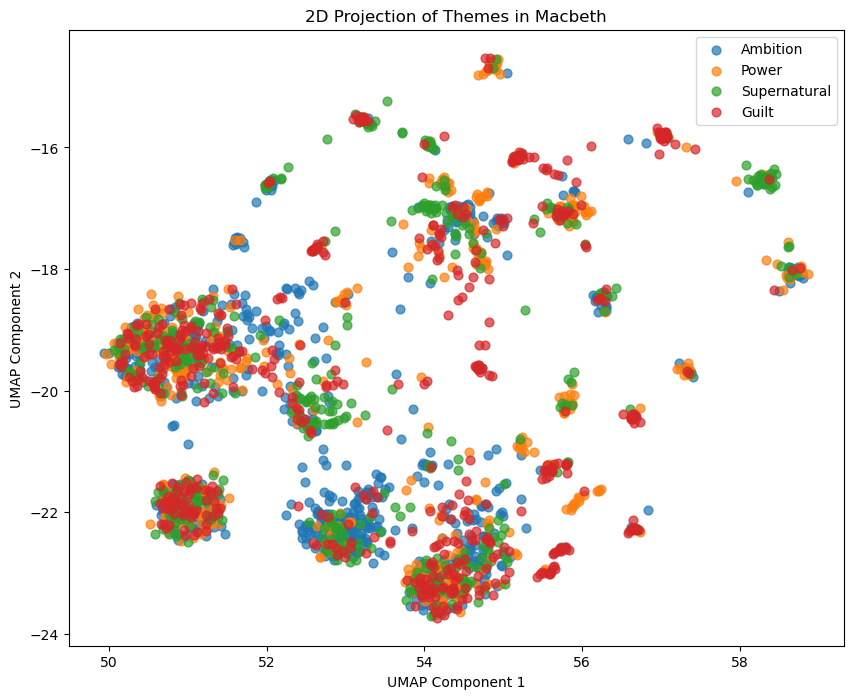

In [62]:
import umap
import matplotlib.pyplot as plt

# Apply UMAP for 2D projection
umap_model = umap.UMAP(random_state=42)
umap_embeddings = umap_model.fit_transform(dtm.toarray())

# Add UMAP coordinates to DataFrame
macbeth_lines['umap_x'] = umap_embeddings[:, 0]
macbeth_lines['umap_y'] = umap_embeddings[:, 1]

# Plot 2D UMAP with color-coded themes
plt.figure(figsize=(10, 8))
for theme in macbeth_lines['theme'].unique():
    subset = macbeth_lines[macbeth_lines['theme'] == theme]
    plt.scatter(subset['umap_x'], subset['umap_y'], label=theme, alpha=0.7, s=40)

plt.legend()
plt.title("2D Projection of Themes in Macbeth")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()


C:\Users\engah\AppData\Local\Temp\ipykernel_34680\1540751503.py:28: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



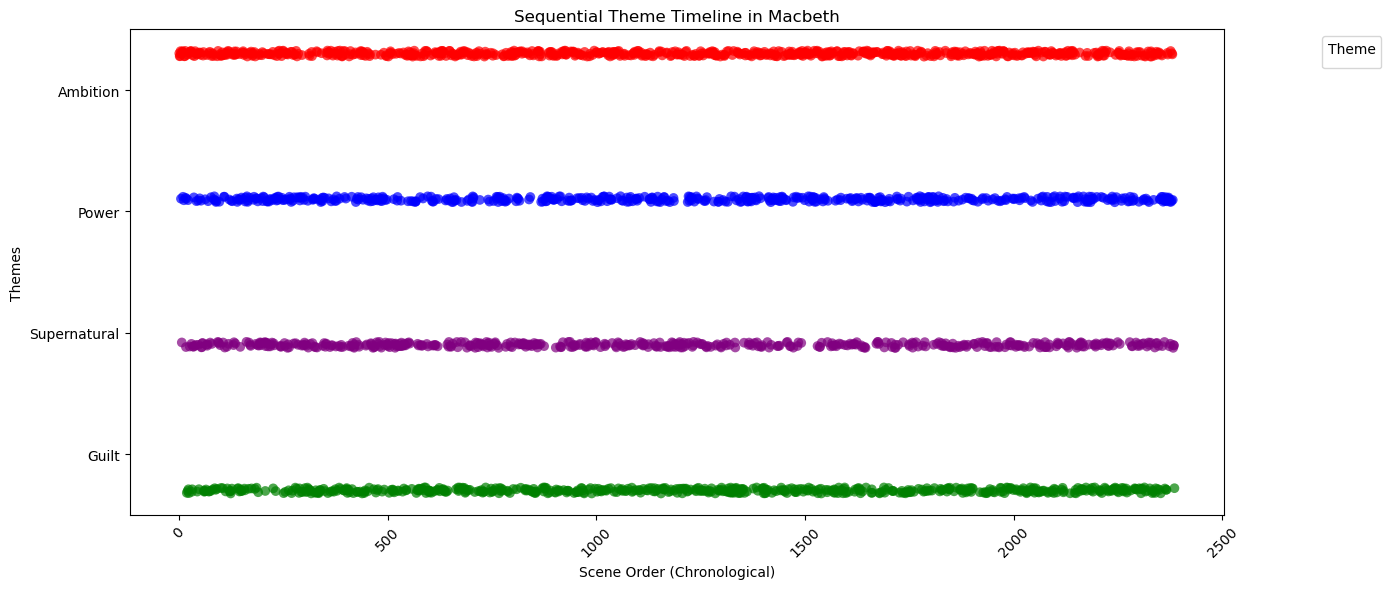

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors for each theme
theme_colors = {'Ambition': 'red', 'Power': 'blue', 'Guilt': 'green', 'Supernatural': 'purple'}

# Create a sequential scene identifier by combining act and scene
macbeth_lines['scene_id'] = macbeth_lines['act'].astype(str) + '.' + macbeth_lines['scene'].astype(str)
macbeth_lines['scene_order'] = range(1, len(macbeth_lines) + 1)  # Sequential order from start to end of play

# Plot themes over the timeline using Seaborn's stripplot for clear sequential representation
plt.figure(figsize=(14, 6))
sns.stripplot(
    data=macbeth_lines,
    x='scene_order', 
    y='theme',
    hue='theme', 
    palette=theme_colors,
    jitter=True,
    dodge=True,
    marker='o',
    size=7,
    alpha=0.7
)

# Customize plot
plt.legend(title="Theme", loc="upper right", bbox_to_anchor=(1.15, 1))
plt.title("Sequential Theme Timeline in Macbeth")
plt.xlabel("Scene Order (Chronological)")
plt.ylabel("Themes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


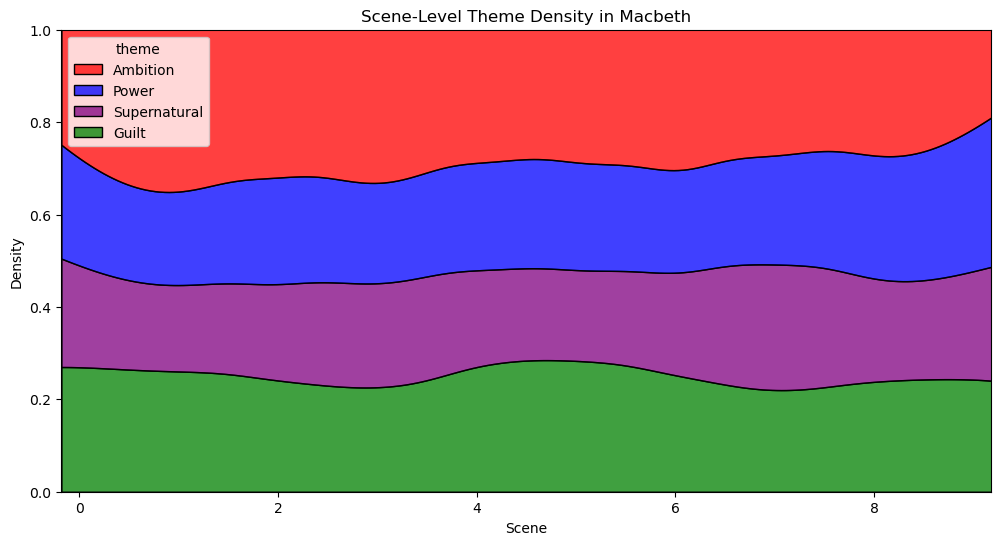

In [65]:
import seaborn as sns

# Plot theme density across scenes
plt.figure(figsize=(12, 6))
sns.kdeplot(data=macbeth_lines, x='scene', hue='theme', multiple="fill", palette=theme_colors)
plt.title("Scene-Level Theme Density in Macbeth")
plt.xlabel("Scene")
plt.ylabel("Density")
plt.show()


In [66]:
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

# Download stopwords if not already done
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess(text):
    tokens = text.lower().split()
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

# Filter for Macbeth's lines and preprocess
macbeth_lines = data[data['play_name'] == 'Macbeth'].copy()
macbeth_lines['processed_text'] = macbeth_lines['text'].apply(preprocess)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\engah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


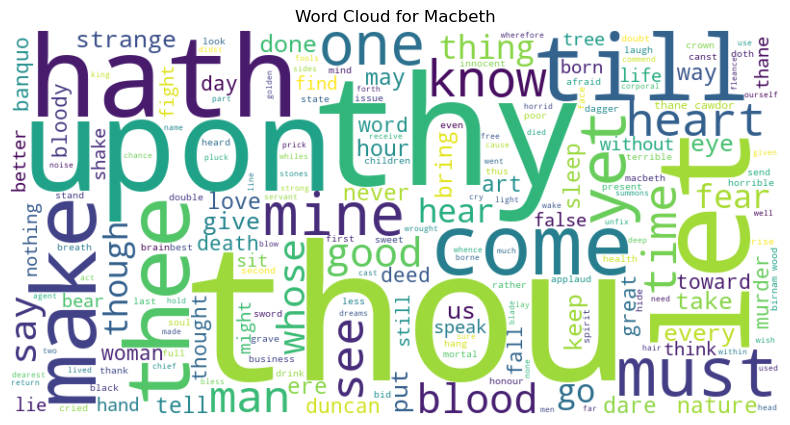

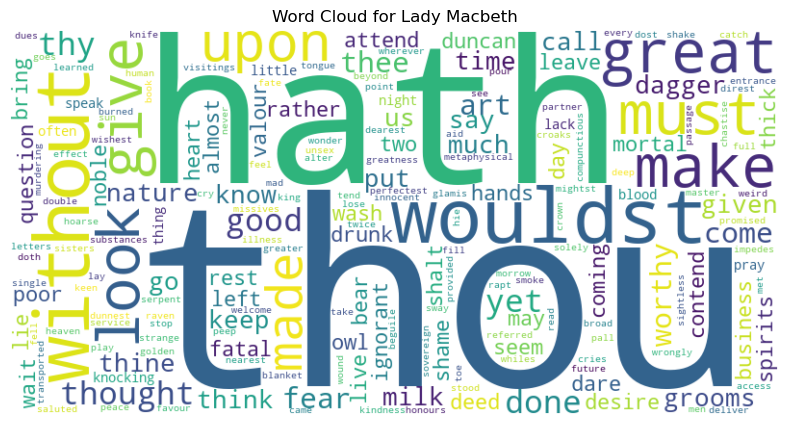

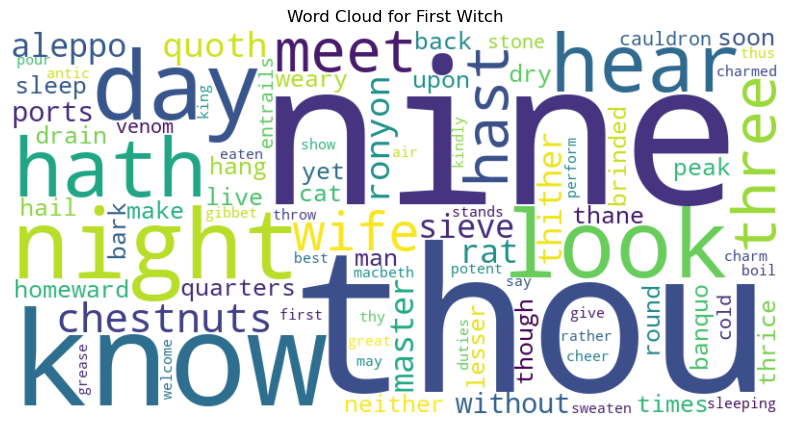

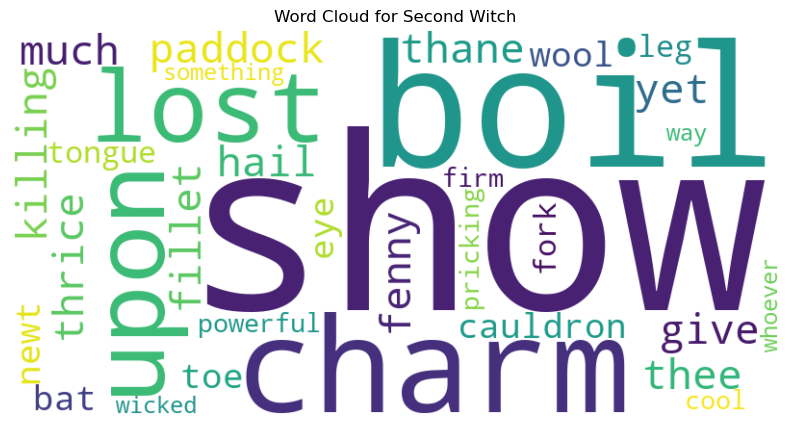

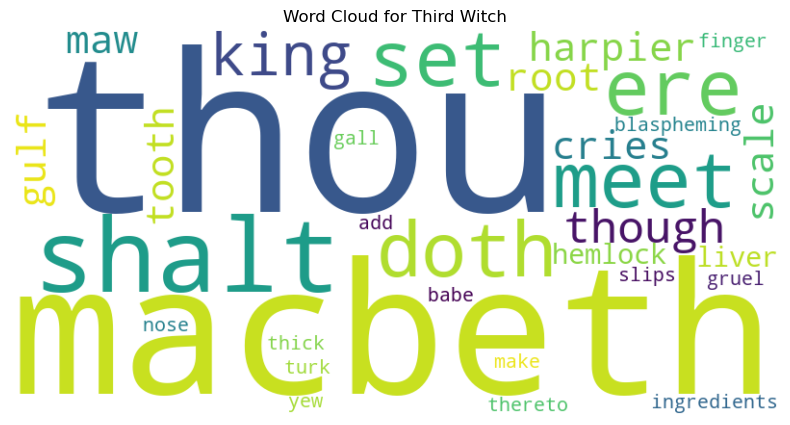

In [67]:
# Define main characters
main_characters = ["Macbeth", "Lady Macbeth", "First Witch", "Second Witch", "Third Witch"]

# Create word clouds for each character
for character in main_characters:
    character_text = ' '.join(macbeth_lines[macbeth_lines['character'] == character]['processed_text'])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(character_text)
    
    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {character}")
    plt.show()


In [68]:
# Define simple keywords for each theme
theme_keywords = {
    'Ambition': ['king', 'crown', 'ambition', 'throne'],
    'Power': ['power', 'control', 'rule', 'command'],
    'Guilt': ['guilt', 'blood', 'wash', 'fear', 'sleep'],
    'Supernatural': ['witch', 'spell', 'prophecy', 'ghost', 'spirit']
}

# Function to assign a theme based on the presence of keywords
def assign_theme(text):
    for theme, keywords in theme_keywords.items():
        if any(keyword in text for keyword in keywords):
            return theme
    return 'Other'

# Apply the function to create the 'theme' column
macbeth_lines['theme'] = macbeth_lines['processed_text'].apply(assign_theme)


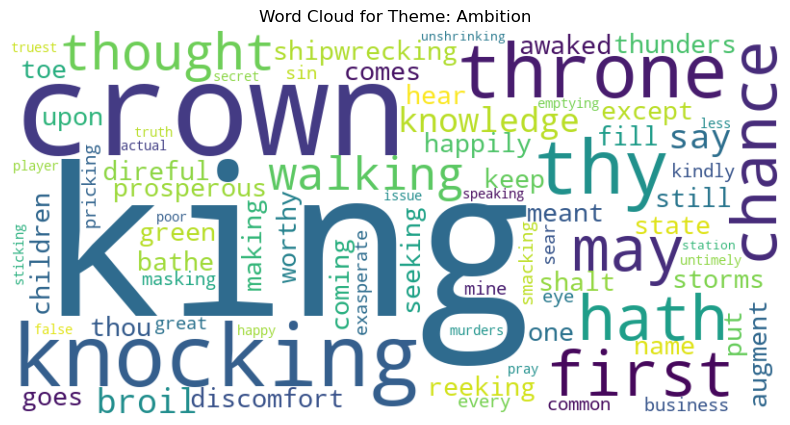

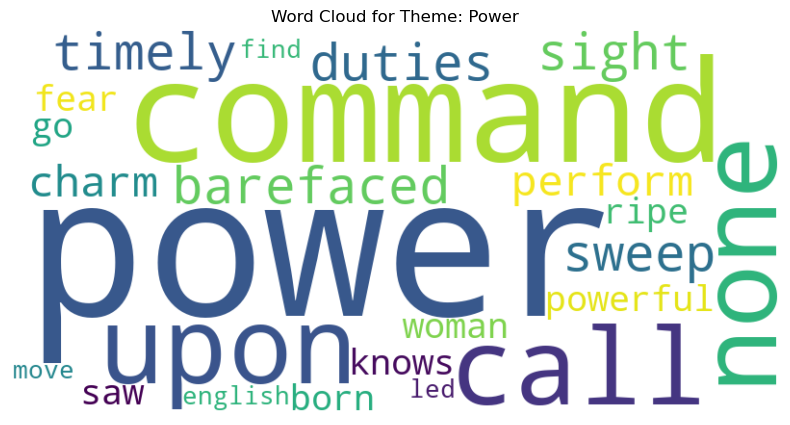

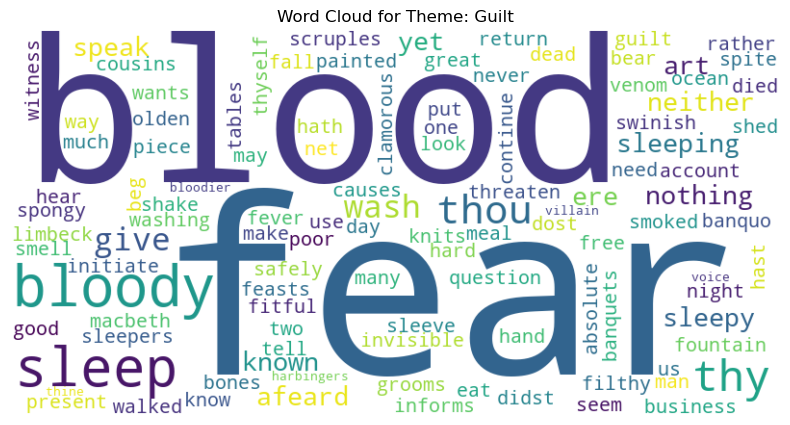

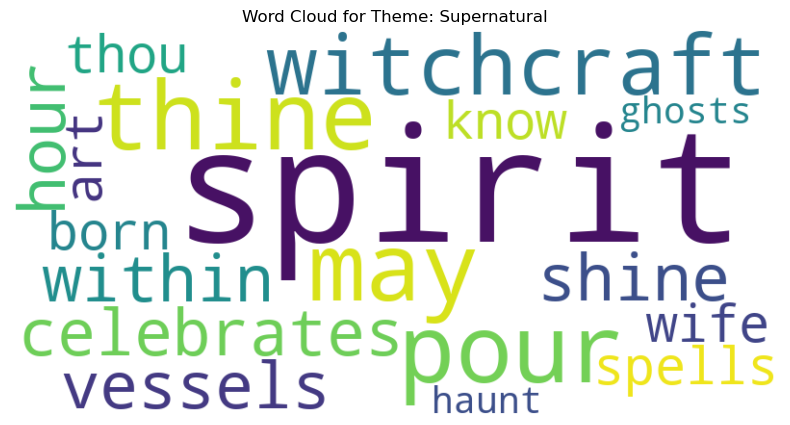

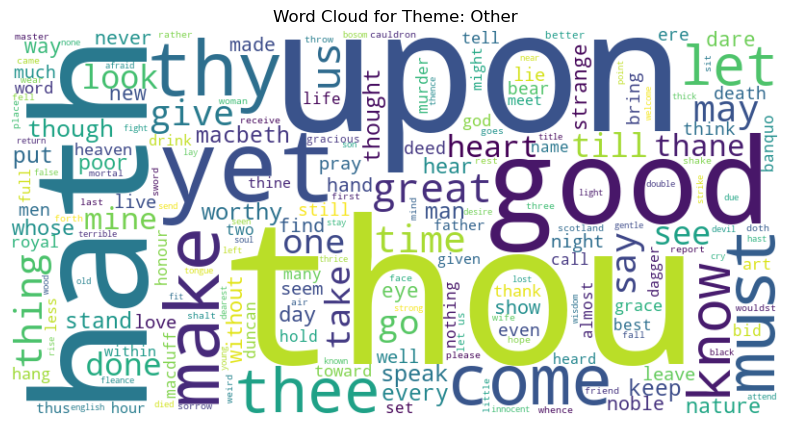

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define themes for word cloud generation
theme_labels = ['Ambition', 'Power', 'Guilt', 'Supernatural', 'Other']

# Create word clouds for each theme
for theme in theme_labels:
    theme_text = ' '.join(macbeth_lines[macbeth_lines['theme'] == theme]['processed_text'])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(theme_text)
    
    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Theme: {theme}")
    plt.show()


In [1]:
from nbconvert import HTMLExporter
import nbformat

# Load the .ipynb notebook file
notebook_filename = "solution_Macbeth.ipynb"  # Replace with the actual path to your notebook file
notebook = nbformat.read(notebook_filename, as_version=4)

# Export the notebook to HTML
html_exporter = HTMLExporter()
html_exporter.exclude_input = False  # Exclude code cells if desired
html_data, resources = html_exporter.from_notebook_node(notebook)

# Save the HTML output
output_html_filename = "solution_Macbeth.html"  # Output path for HTML file
with open(output_html_filename, "w", encoding="utf-8") as f:
    f.write(html_data)

output_html_filename

c:\Users\engah\anaconda3\envs\xai_proj_space\share\jupyter\nbconvert\templates\base\display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.plotly.v1+json']) is not able to be represented.
  {%- elif type == 'text/vnd.mermaid' -%}


'solution_Macbeth.html'